## Filter - Kalman

In [1]:
# TSPredIT
# version 1.0.767

source("https://raw.githubusercontent.com/cefet-rj-dal/tspredit/main/jupyter.R")

#loading TSPredIT
load_library("daltoolbox") 
load_library("tspredit") 

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Loading required package: tspredit



### Series for studying with added noise

In [2]:
data(sin_data)
y <- sin_data$y
noise <- rnorm(length(y), 0, sd(y)/10)
spike <- rnorm(1, 0, sd(y))
sin_data$y <- sin_data$y + noise
sin_data$y[10] <- sin_data$y[10] + spike
sin_data$y[20] <- sin_data$y[20] + spike
sin_data$y[30] <- sin_data$y[30] + spike

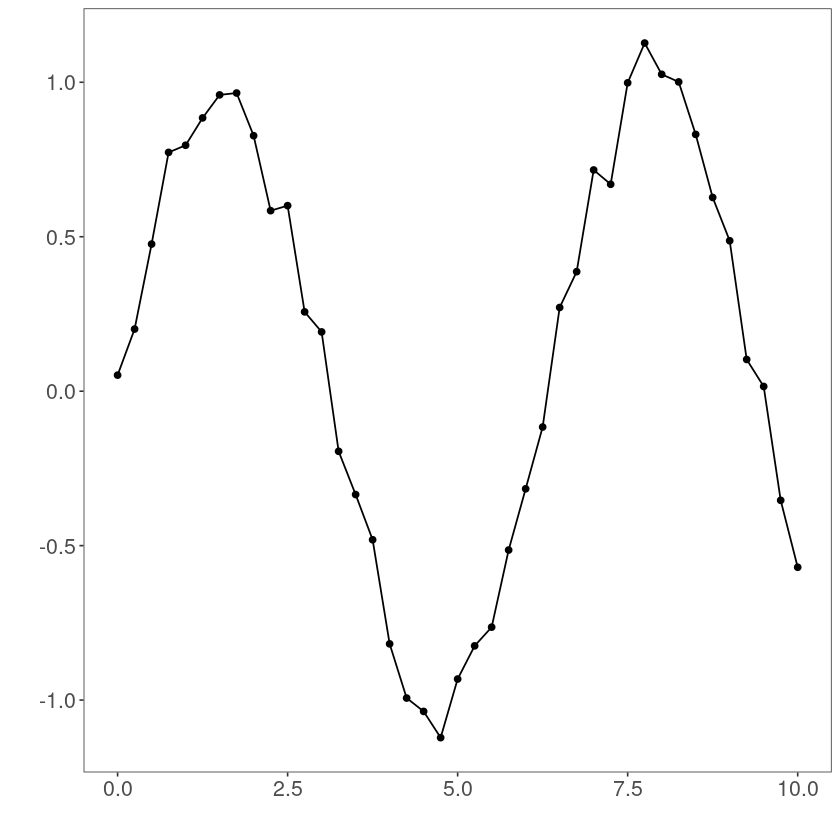

In [3]:
library(ggplot2)
plot_ts(x=sin_data$x, y=sin_data$y) + theme(text = element_text(size=16))

### kalman filter

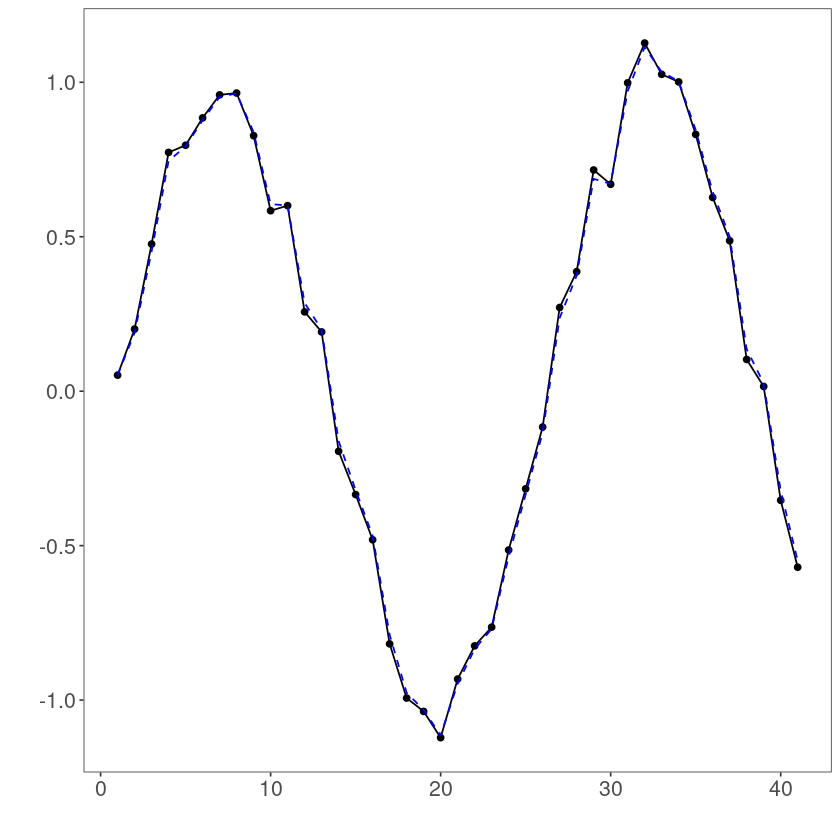

In [4]:
filter <- ts_fil_kalman(H = 0.1, Q = 1)
filter <- fit(filter, sin_data$y)
y <- transform(filter, sin_data$y)
plot_ts_pred(y=sin_data$y, yadj=y) + theme(text = element_text(size=16))